Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment
utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un
prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées
indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de
la manière suivante :
$$
\begin{cases}
\dot x_1 = x_1(\alpha -\beta x_2) \\
\dot x_2 = - x_2( \gamma - \delta x_1) 
\end{cases}
$$
où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement
et $\alpha, \beta, \gamma, \delta$ sont des paramètres strictement positifs.


In [108]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display

### Question 1 ###
Donner une interprétation physique à chaque terme de la dynamique.
Montrer qu’il existe deux points d’équilibre $(0, 0)$ et $\bar{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Que
peut-on dire de leur stabilité à ce stade ? 

### Réponse 1 ###

On a le système d'équation $$
\begin{cases}
\dot x_1 = x_1(\alpha -\beta x_2) \\
\dot x_2 = - x_2( \gamma - \delta x_1) 
\end{cases}
$$  

- $\alpha$ représente le taux de reproduction des proies. La reproduction des proies est indépedante du nombre de prédateurs.
- $\beta$ représente le taux de mortalité des proies, tuées par les prédateurs.
- $\gamma$ représente le taux de mortalité des prédateurs. La mortalité des prédateurs et indépendante du nombre de proies.
- $\delta$ représente le taux de reproduction des prédateurs. La reproduction des prédateurs dépend du nombre de proies mangées


Soit $f:\begin{cases}
\mathbb{R}^2 \to \mathbb{R}^2\\
(x_1, x_2) \to (x_1(\alpha -\beta x_2), - x_2( \gamma - \delta x_1))
\end{cases}
$

On remarque que le point $(0, 0)$ est un point d'équilibre de f.

De plus, si $(x_1, x_2) \neq (0,0)$ (supposons $x_1 \neq 0$), on a $x_2 = \frac{\alpha}{\beta }$ et donc $x_1 = \frac{\gamma}{\delta }$ (de même en supposant $x_2 \neq 0$). 

Soit $\bar x$ = $( \frac{\gamma}{\delta }, \frac{\alpha}{\beta })$. On a bien $\bar x \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$

Pour évaluer la stabilité de ces points d'équilibres, on calcule la jabobienne de f.

$J_f(x1,x2) = \begin{pmatrix} \alpha - \beta x_2 
 & -\beta x_1\\ \delta x_2
 & -\gamma + \delta x_1
\end{pmatrix}$

$J_f(0,0) = \begin{pmatrix} \alpha 
 & 0\\ 0
 & -\gamma
\end{pmatrix}$, les valeurs propres sont $\alpha>0 \,\,\, et \,\,\, -\gamma<0$
Le point d'équilibre $(0,0)$ est donc instable car $\alpha>0$.

$J_f(\frac{\gamma}{\delta },\frac{\alpha}{\beta }) = \begin{pmatrix} 0
 & - \frac{\beta\gamma}{\delta } \\ \frac{\delta\alpha}{\beta }
 & 0 
\end{pmatrix}$
Le polynôme caractéristique de $J_f(\frac{\gamma}{\delta },\frac{\alpha}{\beta })$ est : $\chi(x) = x^2 + \alpha\gamma $, de valeurs propres : $\pm i\sqrt{\alpha\gamma}$

La partie réelle des valeurs propres conjuguées étant nulle, on ne peut pas conclure quant à la stabilité de ce point d'équilibre.

### Question 2
A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le
champ de vecteurs. Intuiter le comportement des solutions. On pourra
aussi utiliser streamplot pour visualiser le portrait de phase.


### Réponse 2

In [109]:
alpha = 3
beta = 1
gamma = 2
delta = 1

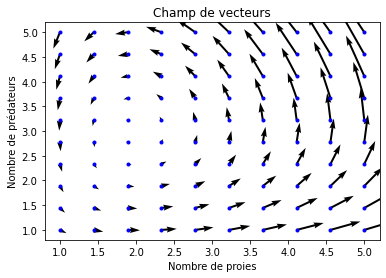

In [110]:
x1 = np.linspace(1, 5, 10)
x2 = np.linspace(1, 5, 10)

xx1, xx2 = np.meshgrid(x1, x2)

v1 = alpha * xx1 - beta * xx1 * xx2
v2 = -gamma * xx2 + delta * xx1 * xx2

plt.quiver(xx1, xx2, v1, v2)
plt.plot(xx1, xx2, marker='.', color='b', linestyle='none')
plt.title("Champ de vecteurs")
plt.xlabel("Nombre de proies")
plt.ylabel("Nombre de prédateurs")
plt.show()

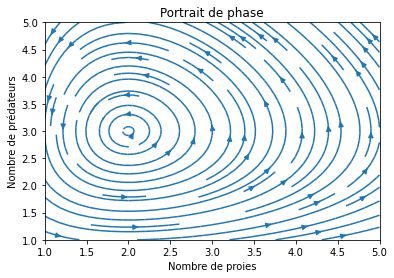

In [111]:
plt.streamplot(xx1, xx2, v1, v2)
plt.title("Portrait de phase")
plt.xlabel("Nombre de proies")
plt.ylabel("Nombre de prédateurs")
plt.show()

Les trajectoires sont fermées et encerclent le point d'équilibre $\bar x$. Ainsi, on peut intuiter que les solutions seront périodiques.

### Question 3
Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition.

### Réponse 3

La fonction $f:(x_1,x_2,t) \to (x_1(\alpha -\beta x_2 ),-x_2 (\gamma - \delta x_1))$  est continue sur $\mathbb{R}^2 \times \mathbb{R}$ et sa dérivée partielle $\partial_xf(x_1,x_2, t) = \begin{pmatrix} \alpha - \beta x_2 
 & -\beta x_1\\ \delta x_2
 & -\gamma + \delta x_1
\end{pmatrix}$ existe et est continue sur $\mathbb{R}^2 \times \mathbb{R}$.

Le théorème de Cauchy-Lipschitz s'applique alors et permet d'affirmer que pour toute condition initiale  $(x_{10},x_{20},t_0) \in \mathbb{R}^2 \times \mathbb{R}$, il existe une unique solution maximale de $S_f(x_{10},x_{20}, t_0)$ , que l'on note $(x_1(t),x_2(t))$, passant par ce point.

Soit $(x_{10},x_{20}, t_0) \in \mathbb{R}_{>0}^2 \times \mathbb{R}$ et $(x_1(t),x_2(t)) \in S_f(x_{10},x_{20}, t_0)$.

Si $(x_1(t),x_2(t))$ est constante, elle reste bien dans $\mathbb{R}_{>0}^2$. On considère dans la suite qu'elle n'est pas constante.

Supposons par l'absurde qu'il existe un temps $t_1$ tel que $(x_1(t_1),x_2(t_1))= (a, 0)$,  $a \in \mathbb{R}$.
On peut alors définir une autre solution $(y_1(t), y_2(t))=(ae^{t-t_1},0)$. Par unicité, on aurait alors $(y_1, y_2)=(x_1, x_2)$ ce qui n'est pas possible car alors la condition initiale $x_{20} \ht 0$ ne serait jamais atteinte. On peut faire le même raisonnement si on suppose que notre solution passe par le point $(0, b), b \in \mathbb{R}$ pour un temps $t_2$.

Les composantes d'une solution $(x_1,x_2)$ ne s'annulent donc jamais et sont ainsi toujours strictements positives (par continuité).

### Question 4
On considère $H$ définie sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ par :  
 $H(x_1, x_2) = \delta x_1 - \gamma \ln (x_1) + \beta x_2 - \alpha \ln(x_2)$.   Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$.

### Réponse 4

La fonction $H$ est dérivable sur son ensemble de définition par somme de fonction dérivable.
Soit $x =(x_1, x_2) \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$

On a $\nabla H(x_1, x_2) = \begin{pmatrix}
 \delta - \frac{\gamma}{x_1} \\
 \beta -\frac{\alpha}{x_2} \end{pmatrix}$ 
 et $\frac{dH}{dt}(t)=\langle \nabla H(x), f(t)\rangle$
 
On a donc $\frac{dH}{dt}(t) = \langle \begin{pmatrix}
 \delta - \frac{\gamma}{x_1} \\
 \beta -\frac{\alpha}{x_2} \end{pmatrix},
 \begin{pmatrix}
 \begin{array}xx_1(\alpha - \beta x_2)\\
 -x_2(\gamma-\delta x_1)\end{array}
 \end{pmatrix}\rangle= (\delta - \frac{\gamma}{x_1})x_1(\alpha - \beta x_2) - (\beta - \frac{\alpha}{x_2})x_2(\gamma - \delta x_1) = (\gamma - \delta x_1)(\beta x_2 - \alpha) - (\beta x_2 - \alpha)(\gamma - \delta x_1) = 0$
 
On en déduit que la fonction $H$ ne dépend pas du temps et donc pour tout $t$, $ \| H(x(t)) \|= C $.

D'après le théorème du domaine maximal d'existence, toute solution maximale $x$ est définie sur  un intervalle ouvert $]t_m^-, t_m^+[$ avec $t_m^-$ et $t_m^+$ dans $\mathbb{R} \cup \{- \infty, +\infty \}$. 

On suppose $t_m^+$ fini.
Comme f est autonome, et $t_m^+$ fini, on a $\lim\limits_{x \rightarrow t_m^+} \|(x_1,x_2)\| = +\infty$.
Alors $\| H\| \to +\infty$ quand $t \to t_m^+$ car $\ln (x)$ est négligeable par rapport à $x$ en $+\infty$.

Or on a vu que $\| H(x(t)) \|= C $. On tombe donc sur une contradiction, et on en déduit que $t_m^+$ ne peut pas être fini. On peut suivre le même raisonnement pour $t_m^-$. Ainsi, $x$ est définie sur $\mathbb{R}$, et donc toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$.

### Question 5
Représenter les courbes de niveau de $H$. Où se trouve $\bar{x}$ ? Qu’en conclut-on sur le comportement des solutions ? En déduire (graphiquement) que $\bar{x}$ est stable, au sens de la définition de stabilité.

### Réponse 5

In [112]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(X, Y, Z, colors="grey", linestyles="dashed", levels=levels)
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    plt.title("Courbes de niveau")

In [113]:
def H(x1, x2):
    return delta * x1 - gamma * np.log(x1) + beta * x2 - alpha * np.log(x2)

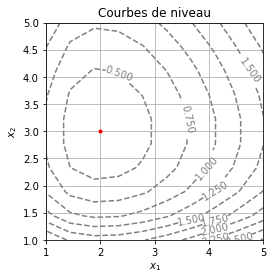

In [114]:
display_contour(H, x1, x2, levels=10)

(x1eq,x2eq)=(gamma/delta, alpha/beta)
plt.plot(x1eq ,x2eq, marker='.', color='r', linestyle='none')
plt.show()

Les courbes de niveau de H sont fermées, ce qui valide l'hypothèse selon laquelle les solutions sont périodiques.

On remarque que $\bar{x}$ = ($x_{1eq}$, $x_{2eq}$) est un extrememum de la fonction H car se trouve au centre des courbes de niveau de cette fonction. De plus, il s'agit d'un minimum car les courbes de niveaux sont décroissantes quand on va vers $\bar{x}$ on peut donc intuiter la stabilité de $\bar x$.

### Question 6
Coder une fonction du type def solve_euler_explicit($f$, $x_0$, $dt$, $t_0$, $t_f$): ... return $t$, $x$ prenant en entrée une fonction $f$ : $\mathbb{R}$×$\mathbb{R}^{n}$ → $\mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t_j$ et de la solution $x_j$ du schéma d’Euler explicite appliqué à $\dot{x}$ = $f(t, x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

### Réponse 6

In [115]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    while t[-1] < tf:
        x.append(x[-1] + dt * f(t[-1], x[-1]))
        t.append(t[-1] + dt)
    return np.array(t), np.array(x)


On choisit comme équation différentielle $\dot{x}=x$ dont la solution est connue.

In [116]:
def f(t,x):
    return x

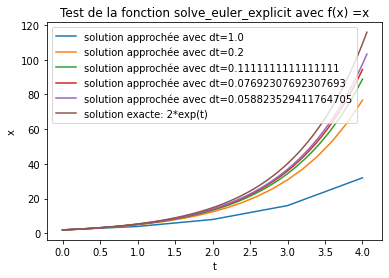

In [117]:
cond_init = 2

dt = [1/i for i in range(1,20,4)]

for j in dt:
    t, x = solve_euler_explicit(f, cond_init, j, 0, 4)
    plt.plot(t, x, label=f"solution approchée avec dt={j}")

plt.plot(t, cond_init * np.exp(t), label=f'solution exacte: {cond_init}*exp(t)')

plt.xlabel("t")
plt.ylabel("x")
plt.title("Test de la fonction solve_euler_explicit avec f(x) =x")
plt.legend()
plt.show()

D'après le cours, s'il existe $p \in \mathbb{N} \gt 0$ et $c \gt 0$ (indépendent de $dt$) tel que : $$max_{1≤j≤J} \|(x^j − x(t_j)\| \leq c(dt)^p$$
ie. tel que $$ln(max_{1≤j≤J} \|(x^j − x(t_j)\|) \leq p ln(dt) + ln(c)$$

on dit que le schéma est convergent à l’ordre $p$.

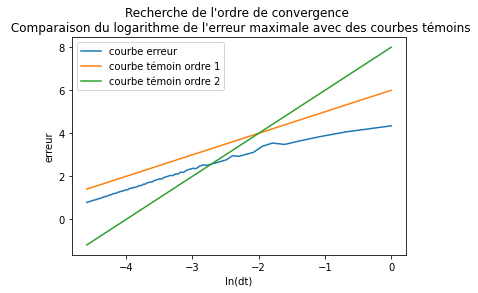

In [118]:
def erreur(x_calc, x_reel):
    err_max = np.linalg.norm(x_calc[0]-x_reel[0])
    for i in range(1, len(x_calc)):
        err = np.linalg.norm(x_calc[i]-x_reel[i])
        err_max = max(err, err_max)
    return err_max
    
err = []
dt = []

for i in range(1, 100):
    t, x_calc = solve_euler_explicit(f, cond_init, 1/i, 0, 4)
    x_reel = []
    for ti in t:
        x_reel.append(cond_init * np.exp(ti))
    x_reel = np.array(x_reel)
    dt.append(1/i)
    err.append(erreur(x_calc, x_reel))

lnc1 = 6
lnc2 = 8

plt.plot(np.log(np.array(dt)), np.log(np.array(err)), label='courbe erreur')
plt.plot(np.log(dt), np.log(dt) + lnc1, label='courbe témoin ordre 1')
plt.plot(np.log(dt), 2*np.log(dt) + lnc2, label='courbe témoin ordre 2')

plt.xlabel("ln(dt)")
plt.ylabel("erreur")
plt.title("Recherche de l'ordre de convergence \n Comparaison du logarithme de l'erreur maximale avec des courbes témoins")
plt.legend()
plt.show()

Donc pour $c = e^6$ et $p=1$ on a (graphiquement), pour tout $dt$ $$ln(max_{1≤j≤J} \|(x^j − x(t_j)\|) \leq p ln(dt) + ln(c)$$
Donc la méthode d'Euler explicite est d'ordre 1.

### Question 7
Utiliser le schéma d’Euler explicite pour simuler les équations de LotkaVolterra. Que constate-t-on en temps long ? Cette résolution vous semblet-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction $H$.

### Réponse 7

In [119]:
def flv(t, x):
    return(np.array([x[0] * (alpha - beta * x[1]), -x[1] * (gamma - delta * x[0])]))

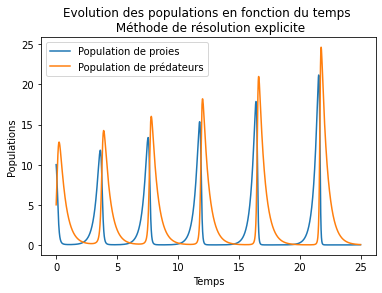

In [120]:
T, X = solve_euler_explicit(flv, np.array([10,5]), 0.01, 0, 25)
plt.plot(T, X[:,0], label="Population de proies")
plt.plot(T, X[:,1], label="Population de prédateurs")
plt.title("Evolution des populations en fonction du temps \n Méthode de résolution explicite")
plt.xlabel("Temps")
plt.ylabel("Populations")
plt.legend()
plt.show()

Les solutions divergent en temps long ce qui semble en désaccord avec les réponses 2 et 5 qui annonçaient des solutions périodiques.

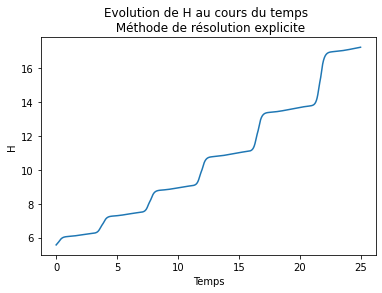

In [121]:
h=[H(x1, x2) for x1, x2 in X]
plt.plot(T, h)
plt.title("Evolution de H au cours du temps \n Méthode de résolution explicite")
plt.xlabel("Temps")
plt.ylabel("H")
plt.show()

Selon la réponse 4, $H$ devrait être constante sur les solutions des équations de Lotka-Volterra, or ici ce n'est pas le cas donc cette résolution n'est pas satisfaisante.

### Question 8

Coder maintenant une fonction du type 

def solve_euler_implicit($f$, $x_0$, $dt$, $t_0$, $t_f$, $itermax = 100$):\
... \
return $t$, $x$

donnant la solution d’un schéma d’Euler implicite appliqué à $\dot{x} = f(t, x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

### Réponse 8

In [122]:
def point_fixe(f, x_j, t_j, dt, eps = 10**-14): #un tel epsilon est choisi pour être proche de la présicion machine
    
    x_j0 = x_j + dt * f(t_j, x_j)
    
    x_jk = x_j0
    x_jk1 = x_j + dt * f(t_j + dt, x_jk)
    
    while np.linalg.norm(x_jk1 - x_jk) > eps * np.linalg.norm(x_j0) :
        x_jk, x_jk1 = x_jk1, x_j + dt * f(t_j + dt, x_jk)
    
    return x_jk1

def solve_euler_implicit(f, x0, dt, t0, tf):
    
    itermax = (tf-t0)/dt
    n=0
    T = [t0]
    X = [x0]
    
    while T[-1] < tf and n < itermax:
        T.append(T[-1] + dt)
        X.append(point_fixe(f, X[-1], T[-1], dt))
        n+=1
        
    return np.array(T), np.array(X)

Exemple avec $\dot x =x $, $x_0 = 2$, $t_0 = 0$, $t_f=4$

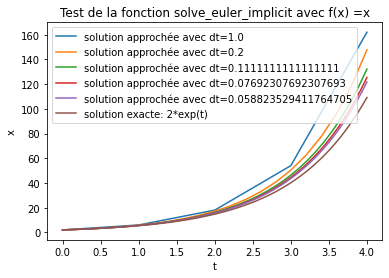

In [123]:
cond_init = 2

dt = [1/i for i in range(1,20,4)]

for j in dt:
    t, x = solve_euler_implicit(f, cond_init, j, 0, 4)
    plt.plot(t, x, label=f"solution approchée avec dt={j}")

plt.plot(t, cond_init * np.exp(t), label=f'solution exacte: {cond_init}*exp(t)')

plt.xlabel("t")
plt.ylabel("x")
plt.title("Test de la fonction solve_euler_implicit avec f(x) =x")
plt.legend()
plt.show()

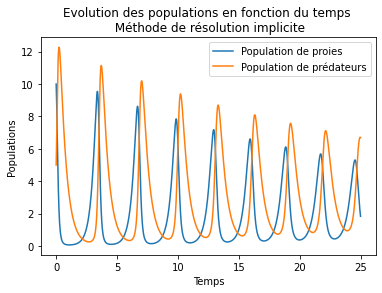

In [132]:
T, X = solve_euler_implicit(flv, np.array([10, 5]), 0.01, 0, 25)
plt.plot(T, X[:,0], label="Population de proies")
plt.plot(T, X[:,1], label="Population de prédateurs")
plt.title("Evolution des populations en fonction du temps \n Méthode de résolution implicite")
plt.xlabel("Temps")
plt.ylabel("Populations")
plt.legend()
plt.show()

Les solutions divergent toujours en temps long ce qui semble en désaccord avec les réponses 2 et 5 qui annonçaient des solutions périodiques.

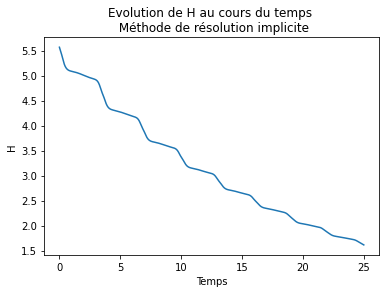

In [133]:
h=[H(x1, x2) for x1, x2 in X]
plt.plot(T, h)
plt.title("Evolution de H au cours du temps \n Méthode de résolution implicite")
plt.xlabel("Temps")
plt.ylabel("H")
plt.show()

Selon la réponse 4, $H$ devrait être constante sur les solutions des équations de Lotka-Volterra, or ici ce n'est pas le cas donc cette résolution n'est pas satisfaisante.

### Question 9

Expliquer pourquoi les solutions de $$(S) = \begin{cases}
\dot x_1 = x_1(\alpha -\beta x_2) - u_1(x_1, x_2)(H(x_1, x_2) - H_0)\\
\dot x_2 = - x_2( \gamma - \delta x_1) - u_2(x_1, x_2)(H(x_1, x_2) - H_0)
\end{cases}$$
sont identiques à celles de Lotka-Volterra si $H_0$ = $H(x(0))$ pour tout choix de $u : \mathbb{R}^2 → \mathbb{R}^2$ continûment différentiable.

### Réponse 9 

Soit $f_2:(x_1,x_2) \to f(x)-(H(x) - H_0)u(x)$

Si $x$ est solution des équations de Lotka-Voltera, alors $H$ ne dépend pas du temps. Donc $\forall t \in \mathbb{R}$, $ H(x(t)) = H(x(0)) = H_0$. Le deuxième terme s'annule alors dans le système $(S)$ et on retrouve les équations de Lotka-Voltera, donc $x$ est aussi solution de $(S)$.

Si $x$ est solution de $(S)$, d'après Cauchy-Lipschitz ($f_2$ est continue et sa dérivée partielle existe et est continue puisque $H$ et $u$ sont continûment différentiable sur $\mathbb{R}_{>0}^2$), la solution est unique. Soit $x'$ la solution des équations de Lotka-Voltera pour les même conditions initiales, d'après ce qui précède $x'$ est aussi solution du système ci-dessus. Alors d'après Cauchy-Lipschitz, $x=x'$. Donc $x$ est solution des équations de Lotka-Voltera.

Ainsi pour toute fonction $u$ de $\mathbb{R}^2$ dans $\mathbb{R}^2$ continûment différentiable, les solutions du système ci-dessus sont les mêmes que celles de Lotka-Volterra.

### Question 10

Soit $H_0$ ∈ $\mathbb{R}$. Calculer la dérivée de $H − H_0$ le long des solutions de ce nouveau système. Montrer que l’on peut choisir u tel que $
\frac{d}{dt}(H(x(t)) - H_0) = - k \| \nabla H(x(t)) \|^2 (H(x(t)) - H_0)
$ . En déduire qu’alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l’infini si $x$ reste à une distance strictement positive de $\bar{x}$.

### Réponse 10

Soit  $u$ une fonction de $\mathbb{R}^2$ dans $\mathbb{R}^2$ continûment différentiable.
On a :

$
\frac{d}{dt}(H(x) - H_0) = \langle \nabla H(x), f(x) - (H(x)-H_0)u(x)\rangle
\\= \langle \nabla H(t), f(x) \rangle - \langle \nabla H(x), (H(x) - H_0)u(x) \rangle
\\= - (H(x) - H_0) \langle \nabla H(x), u(x) \rangle
$ (car si $x$ est solution de $(S)$, $\frac{dH}{dt}(t)=0$)

On peut poser $u(x) = k \nabla H(x)$ et on tombe bien sur
$\frac{d}{dt}(H(t) - H_0) = - k \| \nabla H(t) \|^2 (H(t) - H_0)$

Supposons que pour tout $t$, $\| x - \bar{x}\|\ \ge c \gt 0$

On a $\|\nabla H(t))\|^2 = \| \begin{pmatrix}
 \delta - \frac{\gamma}{x_1} &
 \beta -\frac{\alpha}{x_2} \end{pmatrix} \| ^2
  = (\delta - \frac{\gamma}{x_1})^2 + (\beta -\frac{\alpha}{x_2})^2
  = \delta^2 - 2 \frac{\delta\gamma}{x_1} + \frac{\gamma^2}{x_1^2} + \beta^2 - 2 \frac{\beta\alpha}{x_2} + \frac{\alpha^2}{x_2^2}$

Et $\|x-\bar x\|^2 = (x_1 - \frac{\gamma}{\delta})^2 + (x_2 - \frac{\alpha}{\beta})^2
\\ = x_1^2 - 2 \frac{\gamma}{\delta} x_1 + \frac{\gamma^2}{\delta^2} + x_2^2 -2 \frac{\alpha}{\beta}x_2 + \frac{\alpha^2}{\beta^2}
\\ = \frac{x_1^2}{\delta^2}(\delta^2 - 2 \frac{\delta\gamma}{x_1} + \frac{\gamma^2}{x_1^2}) + \frac{x_2^2}{\beta^2}(\beta^2 - 2 \frac{\beta\alpha}{x_2^2} + \frac{\alpha^2}{x_2^2}) \ge c \gt 0$

On pose $K = \frac{\|x\|^2}{min(\delta^2, beta^2)}$
et on a alors :

$ K \|\nabla H(t))\|^2 \ge \| x - \bar{x}\|^2 \ge c \gt 0 \Leftrightarrow \|\nabla H(t))\|^2 \ge \frac{c}{K} \gt 0 $

On pose $c' = \frac{c}{K}$.

On a donc $\frac{d}{dt}(H(t)) - H_0) \le - k c' (H(t)) - H_0)$

Alors si $H(x(t)) \neq H_0$, $\frac{d}{dt}(ln(H(x(t)) - H_0)) \le - k c'$

Par croissance de l'intégrale, $ln(H(x(t)) - H_0) - ln(H(x(t_0))- H_0) \le - k c't + kc't_0$

On en déduit que :

$$ (H(t)) - H_0) \le \lambda exp(-kc't)$$

On en déduit que $H(x(t))$ converge bien exponentiellement vers $H_0$.

### Question 11

En déduire comment modifier l’implémentation du schéma d’Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $H(x_{j+1}) − H(x_0)$ en fonction de $H(x_j) − H(x_0)$ au premier ordre en $dt$.

### Réponse 11

On effectue un développement limité de $H$ en $x_{j+1}$. 
$
H(x_{j+1})-H_0= H(x_j)-H_0+dH(x_j)f_2(x_j)dt+o(dt)\\
H(x_{j+1})-H_0\simeq-(k\|\nabla H\|^2dt-1)(H(x_j)-H_0)$ 

Car d'après la question 10, $dH(x(t)) =d(H(x(t)) - H_0) = - k \| \nabla H(x(t)) \|^2 (H(x(t)) - H_0)dt$

$
H(x_{j+1})-H_0-H(x_j)+H_0\simeq-(k\|\nabla H\|^2dt-1)(H(x_j)-H_0)-H(x_j)+H_0 \\
\frac{H(x_{j+1})-H(x_j)}{H(x_j)-H_0}=-k\|\nabla H\|^2dt
$

Le modèle converge si aucune valeur ne s'éloigne beaucoup de $H_0$. On en déduit que $H(x_{j+1})-H(x_j)$ et $H(x_j)-H_0$ doivent être du même ordre de grandeur, donc leur quotient doit rester proche de 1.

Comme on ne maîrtise pas la norme de $\nabla H$ qui est déterminée par les données du problème, on ne peut agir que sur $dt$ et $k$. Donc prendre une valeur de $k$ aussi grande que l'on veut implique de pouvoir prendre une valeur de $dt$ aussi petite que l'on veut. Ceci est impossible car on aurait des problèmes de temps d'éxécution. De plus dans les exemples suivant on voit que prendre une valeur de k trop grande donne des solutions abérantes où qui essaient de passer un nombre négatif en argument d'un logarithme.

In [134]:
k0 = 0.1
cond_init = np.array([10,5])

In [135]:
def flv2(t, x, H_0 = H(cond_init[0], cond_init[1]), k = k0):
    return np.array([x[0] * (alpha - beta * x[1]) - k * (delta - gamma / x[0]) * (H(x[0], x[1]) - H_0),
                    -x[1] * (gamma - delta * x[0]) - k * (beta - alpha/x[1]) * (H(x[0], x[1]) - H_0)])

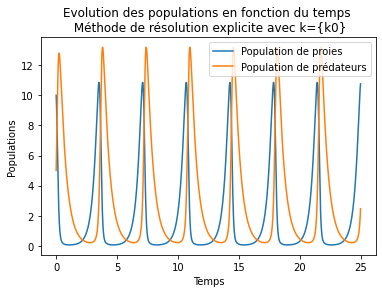

In [136]:
T, X = solve_euler_explicit(flv2, cond_init, 0.01, 0, 25)
plt.plot(T, X[:,0], label="Population de proies")
plt.plot(T, X[:,1], label="Population de prédateurs")
plt.title("Evolution des populations en fonction du temps \n Méthode de résolution explicite avec k={k0}")
plt.xlabel("Temps")
plt.ylabel("Populations")
plt.legend()
plt.show()

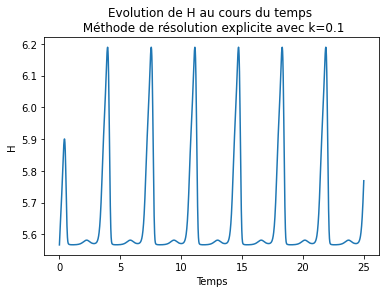

In [137]:
h=[H(x1, x2) for x1, x2 in X]
plt.plot(T, h)
plt.title(f"Evolution de H au cours du temps \n Méthode de résolution explicite avec k={k0}")
plt.xlabel("Temps")
plt.ylabel("H")
plt.show()

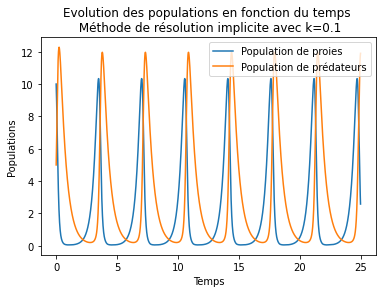

In [138]:
T, X = solve_euler_implicit(flv2, cond_init, 0.01, 0, 25)
plt.plot(T, X[:,0], label="Population de proies")
plt.plot(T, X[:,1], label="Population de prédateurs")
plt.title(f"Evolution des populations en fonction du temps \n Méthode de résolution implicite avec k={k0}")
plt.xlabel("Temps")
plt.ylabel("Populations")
plt.legend()
plt.show()

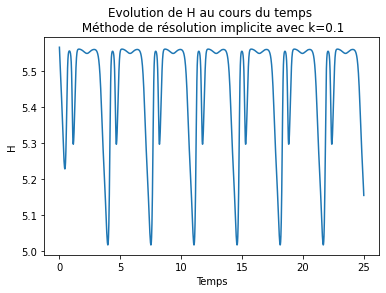

In [139]:
h=[H(x1, x2) for x1, x2 in X]
plt.plot(T, h)
plt.title(f"Evolution de H au cours du temps \n Méthode de résolution implicite avec k={k0}")
plt.xlabel("Temps")
plt.ylabel("H")
plt.show()

Que la méthode utilisée soit la méthode implicite où la méthode explicite $H$ varie encore mais de manière périodique et les solutions que l'on obtient sont également périodiques, on peut alors se satisfaire de l'algorithme qui a été implémenté